In [1]:
from copy import deepcopy
from statistics import stdev
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def graph_progress(all_costs, all_accuracies, show_recents=True):
    # last 5 results
    # ---------------
    if show_recents:
        line1 = "cost: "
        line2 = "acc:  "
        for i in range(-5, 0):
            line1 += "{:>6} ".format(round(all_costs[i], 3))
            line2 += "{:>6}%".format(round(all_accuracies[i]*100, 2))
        print(line1)
        print(line2)


    # graphs
    # -------
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

    axes[0].plot(range(len(all_costs)), all_costs, label="costs")
    axes[0].set_xlabel('step') # Set the y axis label of the current axis.
    axes[0].set_ylabel('cost') # Set a title of the current axes.
    axes[0].set_title('cost over training steps') 
    axes[0].legend() # show a legend on the plot

    axes[1].plot(range(len(all_accuracies)), all_accuracies, label="accuracies")
    axes[1].set_xlabel('step') # Set the y axis label of the current axis.
    axes[1].set_ylabel('accuracy') # Set a title of the current axes.
    axes[1].set_title('accuracy over training steps') 
    axes[1].legend() # show a legend on the plot

    return fig.tight_layout()

# import training data

In [3]:
import pandas as pd #1
import os           #3

In [4]:
given_data_folder = 'prepped'

file_names = os.listdir(given_data_folder)
file_names.sort()
file_names

['.DS_Store',
 'M_predictions.csv',
 'M_testing.csv',
 'M_training_data.csv',
 'W_predictions.csv',
 'W_testing.csv',
 'W_training_data.csv',
 'predictions']

In [5]:
training_data_file = 'M_training_data.csv'

In [6]:
file_path = given_data_folder + '/' + training_data_file 
training_df  = pd.read_csv(file_path)
print(len(training_df))

training_df.head(5)

46338


,Pts,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,...,xFTA_a,xOR_a,xDR_a,xAst_a,xTO_a,xStl_a,xBlk_a,xPF_a,xStr_a,solution
0,0.750000,0.633800,0.787037,0.439078,0.680556,0.750842,0.662162,0.605263,0.851351,0.645833,...,-0.567568,-0.605263,-0.675676,-0.479167,-0.659091,-0.538462,-0.500000,-0.621212,-0.847291,1
1,0.754902,0.658602,0.555556,0.582219,0.930556,0.601307,0.594595,0.578947,0.783784,0.645833,...,-0.675676,-0.578947,-0.770270,-0.354167,-0.659091,-0.807692,-0.375000,-0.606061,-0.400841,-1
2,0.833333,0.763211,0.648148,0.694010,0.555556,0.798333,0.662162,0.236842,0.810811,0.791667,...,-0.567568,-0.657895,-0.635135,-0.687500,-0.454545,-0.615385,-0.500000,-0.606061,-0.768758,1
3,0.699346,0.750538,0.629630,0.404228,0.712963,0.706472,0.513513,0.280702,0.684685,0.625000,...,-0.675676,-0.543860,-0.702703,-0.569444,-0.666667,-0.615385,-0.458333,-0.545455,-0.541014,-1
4,0.700980,0.737634,0.750000,0.435882,0.583333,0.632353,0.391892,0.684211,0.716216,0.708333,...,-0.297297,-0.394737,-0.567568,-0.312500,-0.863636,-0.538462,-0.562500,-0.439394,-0.598615,1


## get as rows

In [7]:
# wether or not to keep the data for stats against a team
keep_against = True

In [8]:
training_column_names = training_df.columns.tolist()

# get all data as columns
training_columns = []
for i in range(len(training_column_names)):
    new_column = list(training_df[training_column_names[i]])
    training_columns.append(new_column)
    

    
# indicis
# 30 each 0:15, 15:30, 30:45, 45:60
if not keep_against:
    new_training_columns = training_columns[0:15] + training_columns[30:45] + [training_columns[60]]
    training_columns = new_training_columns
    
    
    
# get as rows
training_input_rows    = []
training_solution_rows = []
for i in range(len(training_columns[0])):
    new_input_row    = []
    new_solution_row = [training_columns[-1][i]]
    for j in range(len(training_columns)-1):
        new_input_row.append(training_columns[j][i])
        
    training_input_rows   .append(new_input_row)
    training_solution_rows.append(new_solution_row)
    
print(len(training_input_rows), len(training_input_rows[0]))
print(len(training_solution_rows), len(training_solution_rows[0]))

46338 122
46338 1


In [9]:
split = 7_000
np_inputs    = np.array(training_input_rows[:split])
np_solutions = np.array(training_solution_rows[:split])

#np_inputs    = np.array(training_input_rows)
#np_solutions = np.array(training_solution_rows)

np_data = [np_inputs, np_solutions]

# Create and Train population

In [10]:
import sys
sys.path.append("../../..")

from network_matrix.population_v3 import Population

### create it here

In [11]:
'''
learning_rate, steps, batch_size,    cost,      acc,
-------------- ------ ----------- -------- ---------
       0.0001,    50,          2,   0.215,   65.51%,
       
       0.0001     50,          2,   0.190,   71.27%,  # recent 5 games, no stats against
       0.0001    100,          2,   0.188,   71.19%,  # recent 5 games, with stats against
''';

num_inputs = len(np_inputs[0])
num_inputs

122

In [12]:
TEST_population  = Population(num_inputs, 1, learning_rate=0.001)

all_times = [0,0,0,0,0]
all_costs = []
all_accuracies = []

In [13]:
# training loops
# ---------------
#times, costs, accuracies = TEST_population.train_and_test(np_data, 6_000)
times, costs, accuracies = TEST_population.train_and_test_stochastic(np_data, 100, batch_size=10)

# update tracking
# ---------------
for i in range(len(all_times)):
    all_times[i] += times[i]
all_costs      += costs
all_accuracies += accuracies

Training Progress:                             |    cost     acc  |     steps           time      remaining  
                                               | --------  ------ | ----------  -------------  ------------- 


 
               time(s)   percent  per step       | steps:              100
            ----------  --------  --------       | learning rate:    0.001
calc value     2m 9.6s     33.16%      1.3       | # connections:    90344
grad dscnt    3m 47.9s     58.33%     2.28       | L1 (sum):          -0.0
scoring          15.4s      3.94%     0.15       | L2 (**2):        0.0021
step time     6m 30.7s     100.0%     3.91

cost:  0.185  0.185  0.185  0.185  0.185 
acc:   71.04% 70.94% 70.99% 70.99% 70.96%


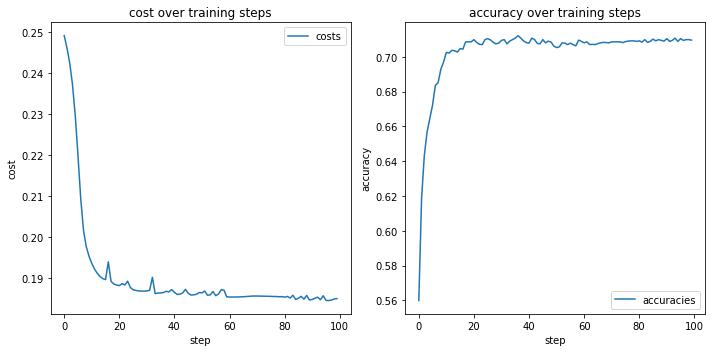

In [14]:
TEST_population.report_training_progress(all_times)     # timing
graph_progress(all_costs, all_accuracies)               # graphs
#graph_progress(all_costs[70:], all_accuracies[70:], show_recents=False) # graphs (recent)

In [15]:
TEST_population.print_magnitudes_report()


           abs_avg   abs_med       sum       max       min
          --------  --------  --------  --------  --------
values       0.547     0.588     -2.87     0.991    -0.994
biases       0.019     0.013    -0.441     0.112    -0.146
weights      0.037     0.025    -8.187     0.319    -0.298
          --------  --------  --------  --------  --------
values       0.222     0.171    -1.879     0.711    -0.698
biases       0.012     0.008    -0.052     0.051     -0.07
weights       0.03     0.019    -1.787      0.25     -0.27
          --------  --------  --------  --------  --------
values        0.12     0.094     0.959     0.526    -0.384
biases       0.007     0.004     0.158     0.053    -0.046
weights      0.029     0.019     8.292     0.246    -0.268
          --------  --------  --------  --------  --------
values        0.65      0.65      0.65      0.65      0.65
biases       0.153     0.153    -0.153    -0.153    -0.153
weights      0.063     0.046    -1.182     0.283    -0.